# Import libraries

In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [115]:
# Set global plots style
plt.style.use('ggplot')

# Load data

In [26]:
# Define file path
file_path_train = os.getcwd()+'/train.csv'
file_path_test = os.getcwd()+'/test.csv'

# Load train and test data
train_raw = pd.read_csv(file_path_train)
test_raw = pd.read_csv(file_path_test)

In [139]:
print(f'The train dataset has {train_raw.shape[0]} rows and {train_raw.shape[1]} columns.') 

The train dataset has 6895 rows and 70 columns.


In [140]:
print(f'The test dataset has {test_raw.shape[0]} rows and {test_raw.shape[1]} columns.') 

The test dataset has 767 rows and 69 columns.


In [29]:
# Concatenate train and test data
df_raw = pd.concat([train_raw, test_raw], ignore_index=True)

# Data exploration

In [31]:
# Check the list of columns
df_raw.columns

Index(['id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_name', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'pow

In [37]:
# Display basic information about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7662 non-null   int64  
 1   short_name                   7662 non-null   object 
 2   overall                      7662 non-null   int64  
 3   potential                    7662 non-null   int64  
 4   value_eur                    7657 non-null   float64
 5   wage_eur                     7662 non-null   int64  
 6   birthday_date                7662 non-null   object 
 7   height_cm                    7662 non-null   int64  
 8   weight_kg                    7662 non-null   int64  
 9   club_name                    7662 non-null   object 
 10  league_name                  7662 non-null   object 
 11  league_level                 7662 non-null   int64  
 12  club_jersey_number           7662 non-null   int64  
 13  club_loaned_from  

In [33]:
# Summary statistics for numerical columns
df_raw.describe()

,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,7662.000000,7662.000000,7662.000000,7.657000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,701.000000
mean,223616.285435,68.842600,72.048029,4.331453e+06,12030.253198,181.484338,75.552467,1.361655,16.525320,2022.763508,...,61.901592,51.349517,52.304098,49.800052,15.903289,15.672409,15.545680,15.813234,16.011877,40.375178
std,26710.529813,5.951663,6.074939,1.045019e+07,24385.866372,6.860952,7.042419,0.761018,15.487419,1.207030,...,10.886174,19.658360,20.918691,20.638862,17.466642,16.767293,16.319634,17.191808,17.877237,10.194699
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,...,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,207642.250000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,...,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000
50%,228152.500000,68.000000,72.000000,1.400000e+06,4000.000000,182.000000,75.000000,1.000000,13.000000,2023.000000,...,63.000000,58.000000,61.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000,42.000000
75%,242513.500000,72.000000,76.000000,3.000000e+06,12000.000000,186.000000,80.000000,1.000000,22.000000,2024.000000,...,69.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000,47.000000
max,264481.000000,93.000000,95.000000,1.940000e+08,350000.000000,203.000000,103.000000,5.000000,99.000000,2031.000000,...,96.000000,92.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


## Check for missing values

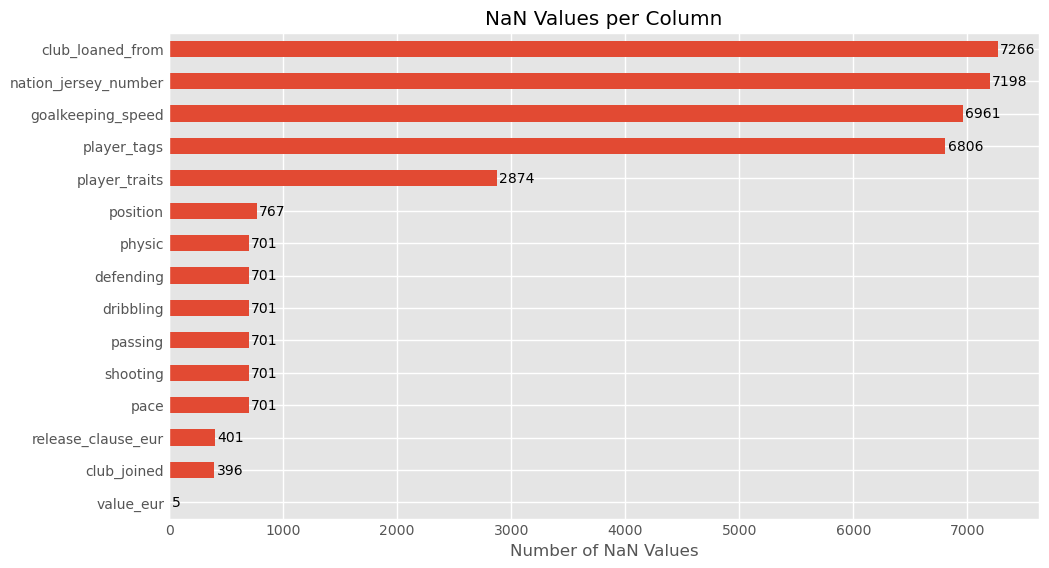

In [100]:
# Check for NaN values and filter columns with more than 0 NaN
na_counts = df_raw.isna().sum()
columns_with_nan = na_counts[na_counts > 0].index
df_missing = na_counts[columns_with_nan].sort_values(ascending=True)

ax = df_missing.plot(kind='barh', figsize=(10, 6))
plt.title('NaN Values per Column')
plt.xlabel('Number of NaN Values')

# Add numbers on the right side of each bar
for i, v in enumerate(df_missing):
    ax.text(v + 20, i, str(v), ha='left', va='center')

plt.show()

Columns that miss more than 80% of the data:
- club_loaned_from
- nation_jersey_number
- goalkeeping_speed
- player_tags

As the goalkeeping_speed most likely is related to the goal keeper characteristics only, it needs more investigation to check if it is populated only for goal keepers or if it also has missing data.

Columns club_loaned_from, nation_jersey_number, player_tags will be dropped in the Data Preparation part due to the high missing values number.

In [95]:
# Checking if goalkeeping_speed is imputed only for position == GK (in the train data only as the test data doesn't have the position column)

res = train_raw[train_raw['position'] == 'GK']['goalkeeping_speed'].notnull().all()
print(f'All values for GK are imputed: {res}')

res1 = train_raw[train_raw['position'] != 'GK']['goalkeeping_speed'].isnull().all()
print(f'No values of goalkeeping_speed for all the other positons are imputed: {res1}')

All values for GK are imputed: True
No values of goalkeeping_speed for all the other positons are imputed: True


Therefore, we see that goalkeeping_speed is imputed only for the position of GK, for all the other positions it's NaN.

In [74]:
na_counts_GK = df_raw[df_raw['position'] == 'GK'].isna().sum().sort_values(ascending=True)
print('Missing values for the GK position: \n')
print(na_counts_GK[na_counts_GK > 0])

Missing values for the GK position: 

release_clause_eur       33
club_joined              33
player_traits           251
nation_jersey_number    571
club_loaned_from        598
pace                    631
shooting                631
passing                 631
dribbling               631
defending               631
player_tags             631
physic                  631
dtype: int64


Also we see that for the GK position such columns as pace, shooting, passing, dribbling, defending, player_tags, physic are completely missing, so we assume that those are not relevant for GK.

## Numerical variables exploration

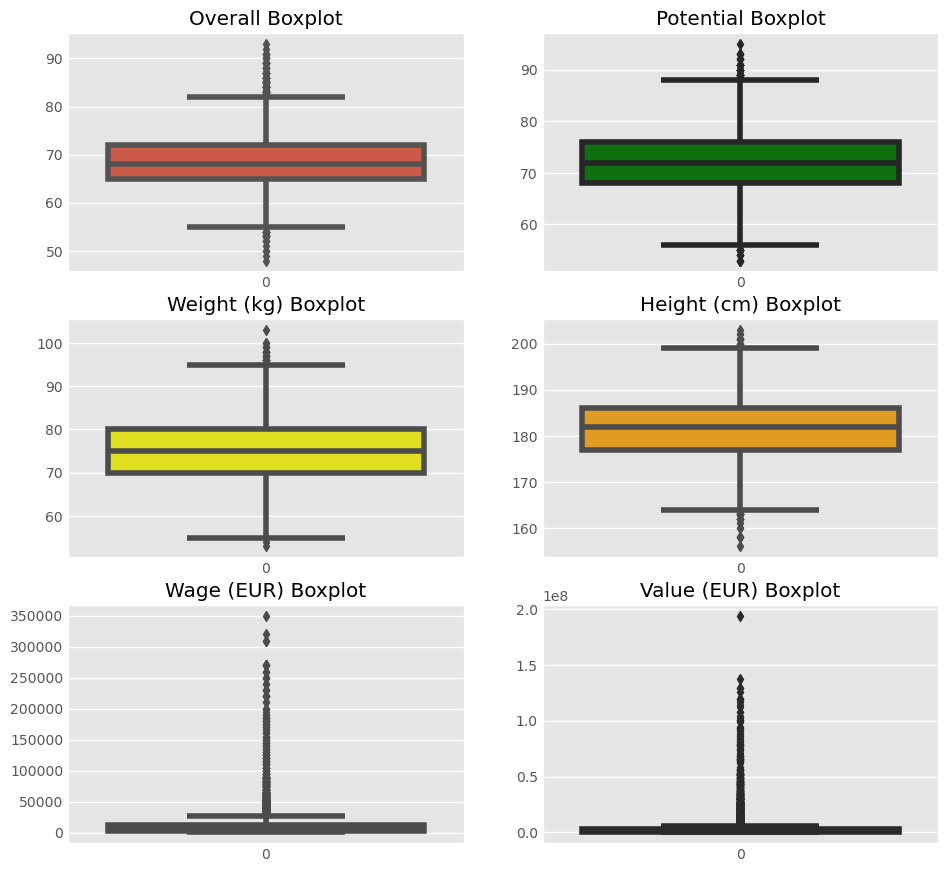

In [101]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(df_raw['overall'], ax = axes[0,0])
axes[0,0].set_title('Overall Boxplot')

sns.boxplot(df_raw['potential'], ax = axes[0,1], color='green')
axes[0,1].set_title('Potential Boxplot')

sns.boxplot(df_raw['weight_kg'], ax = axes[1,0], color = 'yellow')
axes[1,0].set_title('Weight (kg) Boxplot')

sns.boxplot(df_raw['height_cm'], ax = axes[1,1], color='orange')
axes[1,1].set_title('Height (cm) Boxplot')

sns.boxplot(df_raw['wage_eur'], ax = axes[2,0], color='orangered')
axes[2,0].set_title('Wage (EUR) Boxplot')

sns.boxplot(df_raw['value_eur'], ax = axes[2,1], color='darkred')
axes[2,1].set_title('Value (EUR) Boxplot')


plt.show()

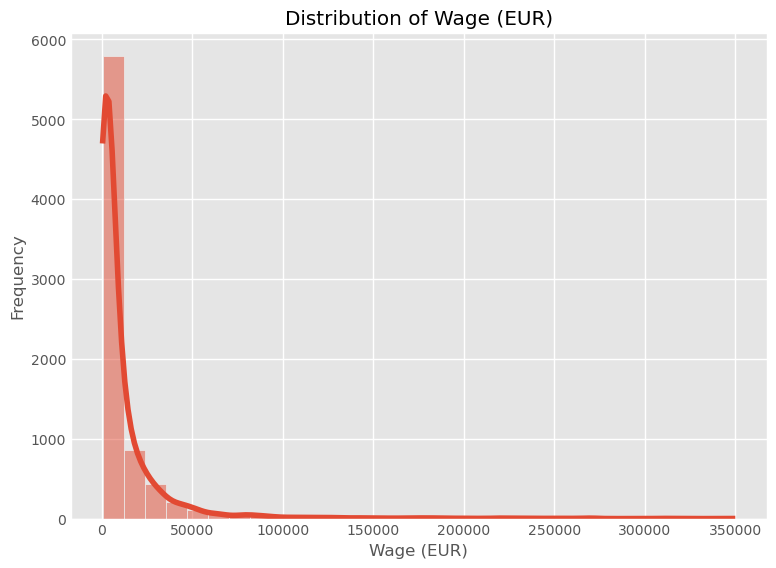

In [137]:
# Visualize the distribution of the wage_eur variable

plt.figure(figsize=(8, 6))
sns.histplot(df_raw['wage_eur'], bins=30, kde=True)
plt.title('Distribution of Wage (EUR)')
plt.xlabel('Wage (EUR)')
plt.ylabel('Frequency')
plt.show()

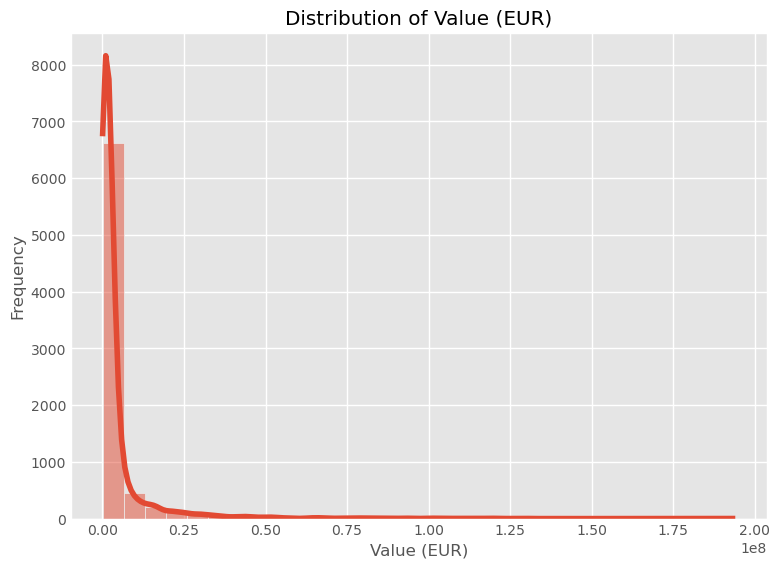

In [136]:
# Visualize the distribution of the value_eur variable

plt.figure(figsize=(8, 6))
sns.histplot(df_raw['value_eur'], bins=30, kde=True)
plt.title('Distribution of Value (EUR)')
plt.xlabel('Value (EUR)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# add correlation matrix!!

In [ ]:
# should we do something with wage and value skeweness?

## Categorical variables exploration

In [121]:
# do we need body type if we have height and weight?

df_raw.body_type.unique()

array(['Normal (170-185)', 'Lean (170-185)', 'Lean (185+)',
       'Normal (185+)', 'Stocky (185+)', 'Normal (170-)', 'Lean (170-)',
       'Stocky (170-185)', 'Stocky (170-)', 'Unique'], dtype=object)

## Explore the 'position' column

In [117]:
# Number of players by position
position_count = df_raw['position'].value_counts().sort_values(ascending=True)
display(position_count)

RF      32
LF      32
CM      75
RWB    104
LWB    104
CDM    151
LW     166
RW     166
CB     167
LDM    201
RS     201
LS     201
RDM    201
CAM    263
LM     369
RM     369
LCM    423
RCM    423
ST     428
LB     463
RB     463
LCB    631
GK     631
RCB    631
Name: position, dtype: int64

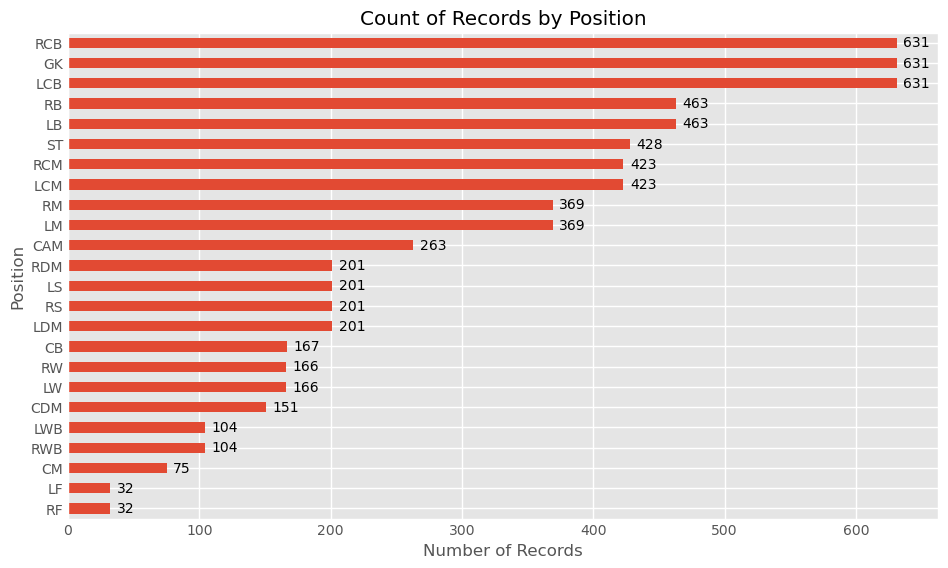

In [116]:
ax = position_count.plot(kind='barh', figsize=(10, 6))
plt.title('Count of Records by Position')
plt.xlabel('Number of Records')
plt.ylabel('Position')

# Add numbers on the right side of each bar
for i, v in enumerate(position_count):
    ax.text(v + 5, i, str(v), ha='left', va='center')

plt.show()

In [123]:
df_raw.columns

Index(['id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_name', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentali

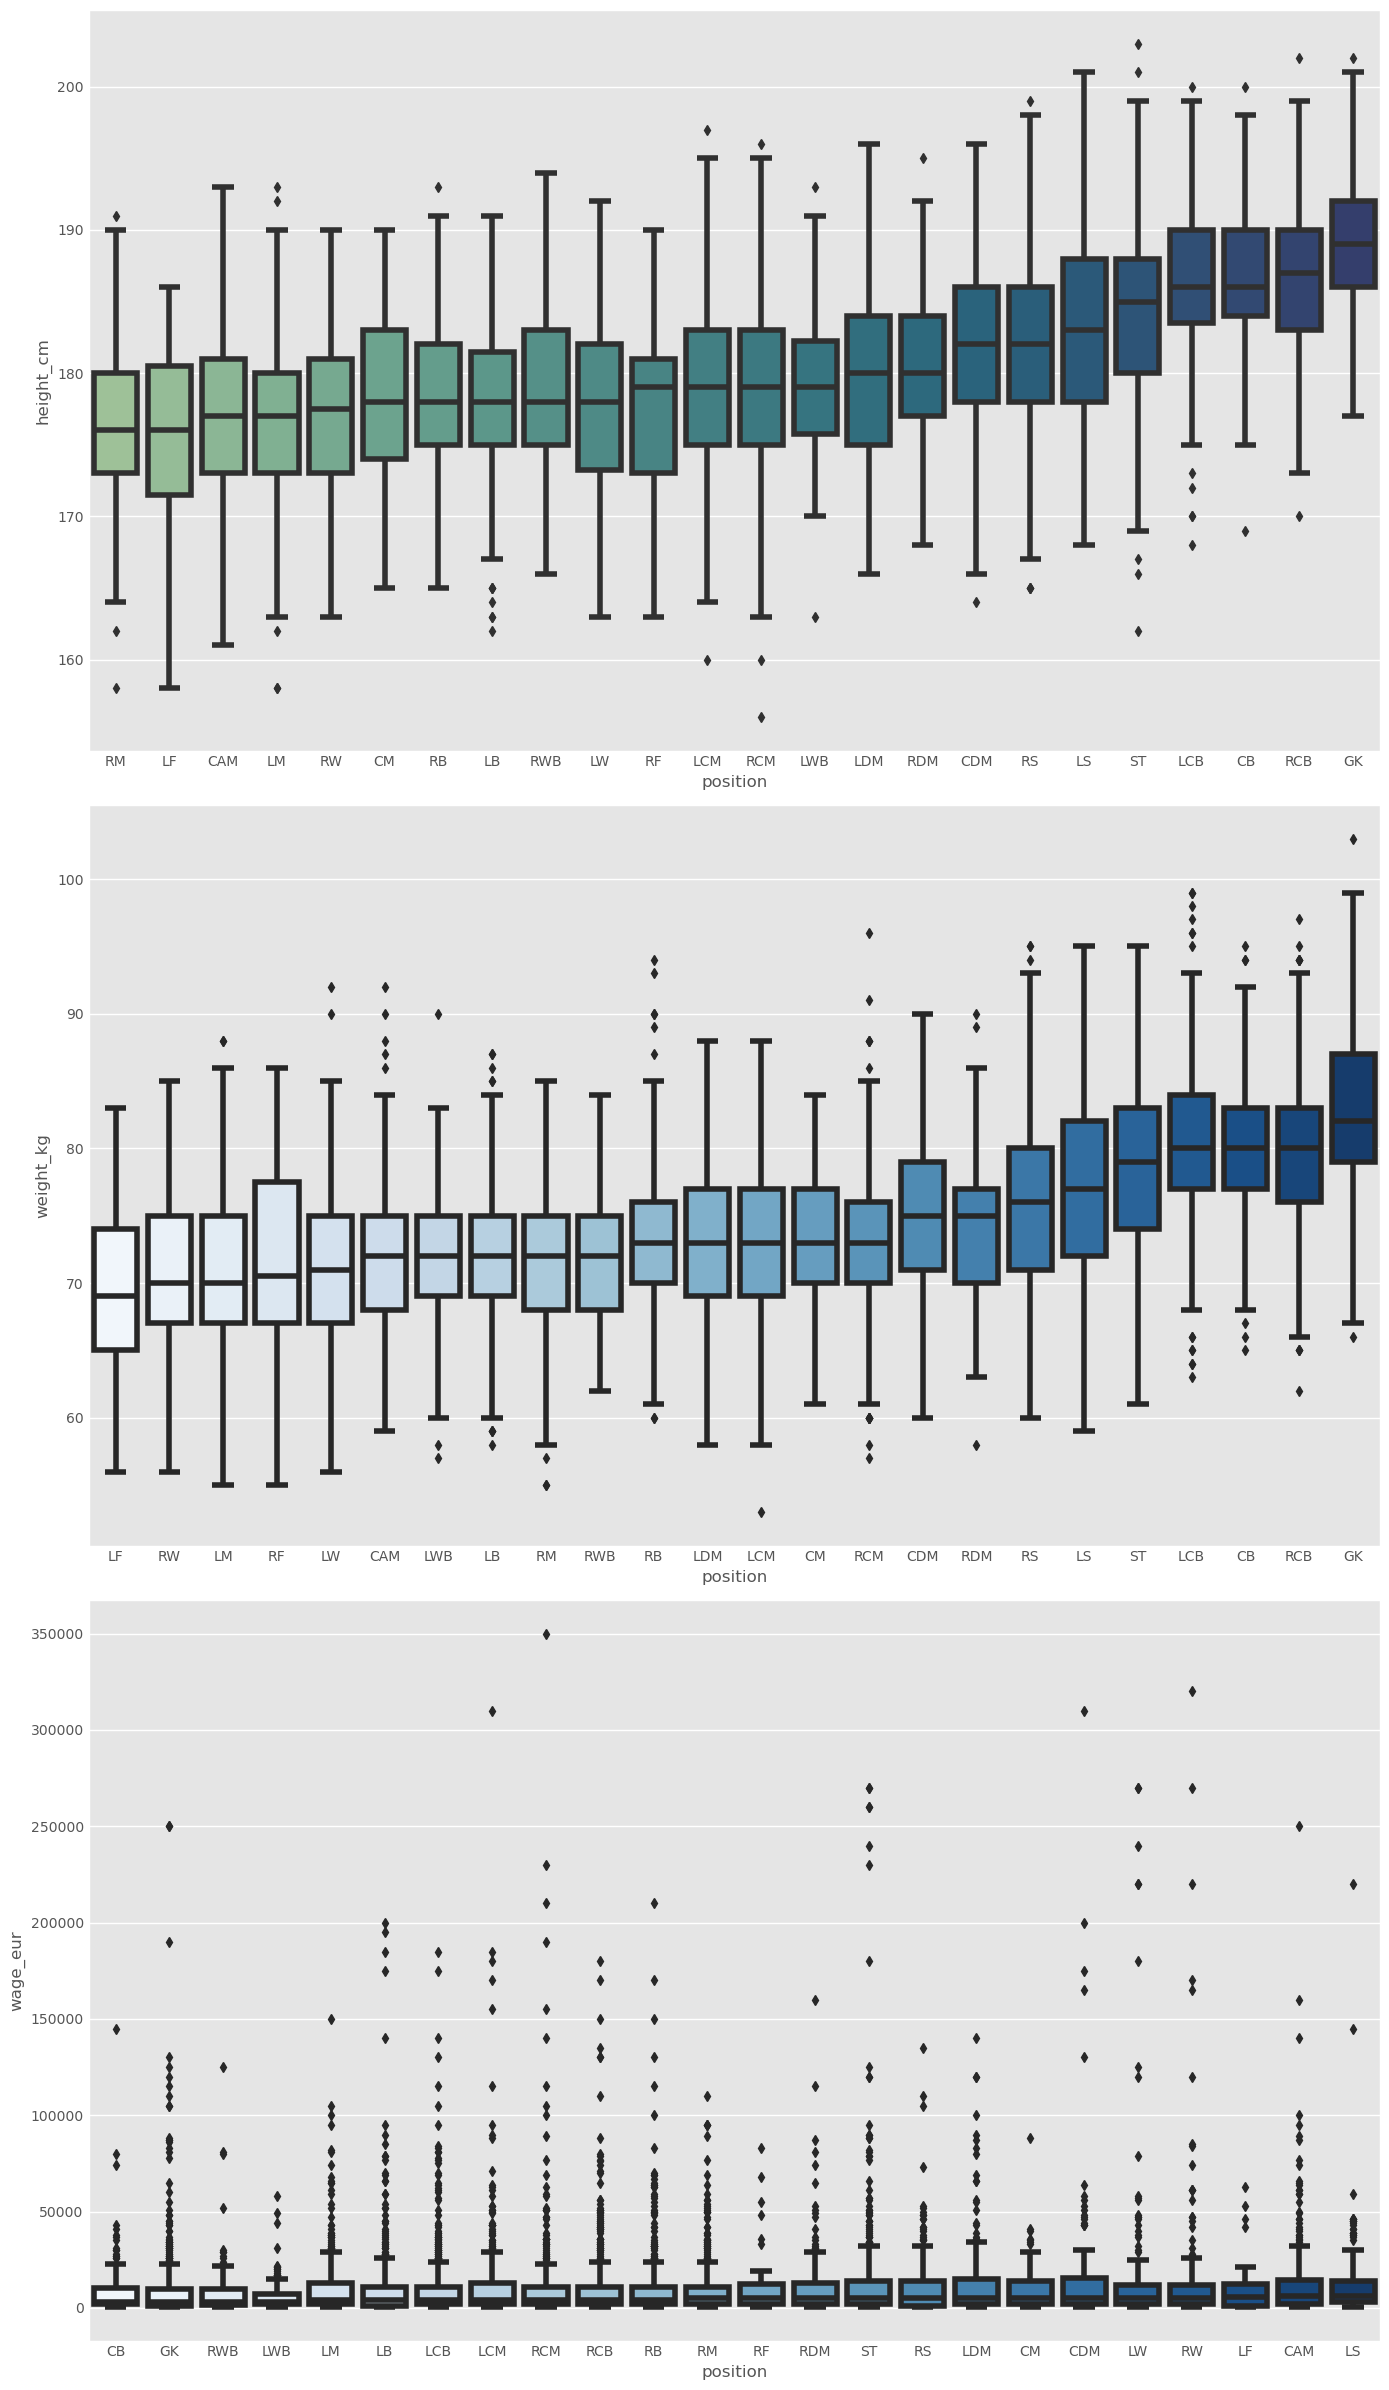

In [126]:
# Calculate the median height for each position
median_heights = df_raw.groupby('position')['height_cm'].median().sort_values(ascending=True)

# Calculate the median weight for each position
median_weights = df_raw.groupby('position')['weight_kg'].median().sort_values(ascending=True)

# Calculate the median wage for each position
median_wage_eur = df_raw.groupby('position')['wage_eur'].median().sort_values(ascending=True)

# Create a subplot with two axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 24))

# Plot the boxplot for height on the first axis
sns.boxplot(ax=axes[0], x='position', y='height_cm', data=df_raw, palette='crest', order=median_heights.index)

# Plot the boxplot for weight on the second axis
sns.boxplot(ax=axes[1], x='position', y='weight_kg', data=df_raw, palette='Blues', order=median_weights.index)

# Plot the boxplot for weight on the second axis
sns.boxplot(ax=axes[2], x='position', y='wage_eur', data=df_raw, palette='Blues', order=median_wage_eur.index)

# Adjust layout
plt.tight_layout()

plt.show()

## Check for outliers

In [128]:
# wage_eur outliers???

# Data Preparation

## Dropping the columns with more than 80% of missing values

In [118]:
# Drop columns club_loaned_from, nation_jersey_number, player_tags
df_raw = df_raw.drop(columns=['club_loaned_from', 'nation_jersey_number', 'player_tags'])

## Imputing missing values

In [10]:
df_raw.loc[df_raw['goalkeeping_speed'] > 0, 'position'].value_counts() # Imputation: 0, field players have no goalkeeping speed.

GK    631
Name: position, dtype: int64

In [11]:
from sklearn.impute import KNNImputer


columns_to_impute = ['value_eur','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

knn_imputer = KNNImputer(n_neighbors=50)  

imputed_data = knn_imputer.fit_transform(df_raw[columns_to_impute])

df_raw[columns_to_impute] = imputed_data

In [12]:
df_raw['goalkeeping_speed'] = df_raw['goalkeeping_speed'].fillna(10)

In [13]:
features = ['overall', 'potential', 'value_eur', 'wage_eur','height_cm', 'weight_kg', 'club_jersey_number', 'preferred_foot',
            'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
            'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
            'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
            'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
            'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','position']

In [14]:
df = df_raw[features]

In [15]:
def one_hot_encoding(data, column):
    data = data.copy() # create deep copy of data

    dummy = pd.get_dummies(data[column]).astype(int) # get dummies
    data = pd.concat([data, dummy], axis=1) # add dummy columns to dataframe 
    data = data.drop(columns = column)

    return data


In [16]:
df['weak_foot']

0       5
1       3
2       3
3       3
4       2
       ..
7657    3
7658    2
7659    4
7660    3
7661    3
Name: weak_foot, Length: 7662, dtype: int64

In [17]:
df = one_hot_encoding(df, 'weak_foot')
df = df.rename(columns={1:'wf_one_star', 2:'wf_two_stars', 3:'wf_three_stars', 4:'wf_four_stars', 5:'wf_five_stars'})

df = one_hot_encoding(df, 'skill_moves')
df = df.rename(columns={1:'sm_one_star', 2:'sm_two_stars', 3:'sm_three_stars', 4:'sm_four_stars', 5:'sm_five_stars'})


In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
encoder = LabelEncoder()
df['preferred_foot'] = encoder.fit_transform(df['preferred_foot'])
df['position'] = encoder.fit_transform(df['position'])


In [19]:
tr = df[:6895]
te = df[6895:]

In [20]:
df

,overall,potential,value_eur,wage_eur,height_cm,weight_kg,club_jersey_number,preferred_foot,pace,shooting,...,wf_one_star,wf_two_stars,wf_three_stars,wf_four_stars,wf_five_stars,sm_one_star,sm_two_stars,sm_three_stars,sm_four_stars,sm_five_stars
0,71,71,1400000.0,10000,176,73,29,1,70.0,52.0,...,0,0,0,0,1,0,0,1,0,0
1,65,71,1000000.0,2000,183,73,4,1,65.0,38.0,...,0,0,1,0,0,0,1,0,0,0
2,65,77,1600000.0,2000,178,69,19,0,79.0,35.0,...,0,0,1,0,0,0,0,1,0,0
3,72,72,2300000.0,5000,188,81,9,1,64.0,74.0,...,0,0,1,0,0,0,0,1,0,0
4,65,65,525000.0,3000,179,74,30,0,74.0,53.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,72,72,2300000.0,17000,165,65,3,0,82.0,66.0,...,0,0,1,0,0,0,0,1,0,0
7658,68,74,1700000.0,2000,180,70,2,1,68.0,44.0,...,0,1,0,0,0,0,1,0,0,0
7659,65,65,700000.0,6000,185,80,9,1,65.0,64.0,...,0,0,0,1,0,0,0,1,0,0
7660,81,81,12500000.0,18000,183,76,30,1,63.0,57.0,...,0,0,1,0,0,0,1,0,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



class Model():
    
    def __init__(self, feature, target, train, test, params = None ): 
        """
        Initialize Model class

        Args:
        feature (list) : List of names of feature columns (str)
        target (str): Name of the target variable
        train (pd.DataFrame): Train dataframe
        test (pd.DataFrame): Test dataframe
        params (dict): Dictionary of specified parameters, default: n_estimators=100, max_depth=None, random_state=None
        """
        self.__feature = feature # 1. Feature columns that are going to be used
        self.__target = target # 2. Target column that is going to be used
        self.__train = train.copy()
        self.__test = test.copy()
        self.model = RandomForestClassifier(**(params or {}))
        self.params = params

    def model_predictions(self):
        """
        RandomForestClassifier predictions for train and test

        Returns:
        Train and test pd.DataFrame with prediction column
        """
        self.model.fit(self.__train[self.__feature], self.__train[self.__target])

        predictions_train = self.model.predict_proba(self.__train[self.__feature])
        predictions_train = pd.DataFrame(predictions_train, index = self.__train.index, columns=[f'pred_{i}' for i in range(24)])
        train = pd.concat([self.__train, predictions_train], axis = 1)

        predictions_test = self.model.predict_proba(self.__test[self.__feature])
        predictions_test = pd.DataFrame(predictions_test, index = self.__test.index, columns=[f'pred_{i}' for i in range(24)])
        test = pd.concat([self.__test, predictions_test], axis = 1)

        return train, test


    def randomized_param_tuning(self):
        """
        Randomaized Parameter Tuning for Random Forest Classifier
        
        Parameter grid:
        n_estimators: Number of trees in random forest
        max_features: Number of features to consider at every split
        max_depth: Maximum number of levels in tree
        min_samples_split: Minimum number of samples required to split a node
        min_samples_leaf: Minimum number of samples required at each leaf node
        bootstrap: method of secelcting samples for training each tree

        Returns: Best parameters (dict)
        """
        model = RandomForestClassifier()
        n_estimators = [5,20,50,100] # Number of trees in random forest
        max_features = ['log2', 'sqrt'] # Number of features to consider at every split
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  # Maximum number of levels in tree
        max_depth.append(None)
        min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
        min_samples_leaf = [1, 2, 4]  # Minimum number of samples required at each leaf node
        bootstrap = [True, False] # Method of selecting samples for training each tree
        random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
        rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
        # Fit the random search model
        rf_random.fit(self.__train[self.__feature], self.__train[self.__target])
        return rf_random.best_params_

In [22]:
rf_model = Model(target='position', feature=df.columns, test=te, train=tr)

In [23]:
best_params = rf_model.randomized_param_tuning()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total tim

In [24]:
features = ['overall', 'potential', 'value_eur', 'wage_eur','height_cm', 'weight_kg', 'club_jersey_number', 'preferred_foot',
            'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
            'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
            'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
            'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
            'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','position', 'wf_one_star', 'wf_two_stars', 
            'wf_three_stars', 'wf_four_stars', 'wf_five_stars', 'sm_one_star', 'sm_two_stars', 'sm_three_stars', 'sm_four_stars', 'sm_five_stars']

In [25]:
X_train = tr[features].drop('position', axis=1)
y_train = tr['position']

X_test = te[features].drop('position', axis=1)

In [26]:
rf = RandomForestClassifier(**best_params)

best_model = rf.fit(X_train, y_train)

In [27]:
y_pred = best_model.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='micro')

In [29]:
print('Accuracy: ', accuracy)
print('F1-score: ', f1)

Accuracy:  0.9998549673676578
F1-score:  0.9998549673676578


In [30]:
test_preds = best_model.predict(X_test)
test_preds
decoded_test_preds = encoder.inverse_transform(test_preds)

In [31]:
decoded_test_preds

array(['RB', 'LCB', 'ST', 'RM', 'RB', 'GK', 'RB', 'LCM', 'RDM', 'LCB',
       'ST', 'CAM', 'GK', 'LB', 'RCB', 'LCB', 'RCM', 'LB', 'ST', 'RB',
       'RCM', 'RM', 'ST', 'LCM', 'RB', 'LCB', 'LB', 'RDM', 'GK', 'RB',
       'LB', 'GK', 'LM', 'GK', 'RCB', 'RM', 'GK', 'LCB', 'LCM', 'GK',
       'RCB', 'RDM', 'LB', 'RCB', 'GK', 'LCM', 'ST', 'RCB', 'RB', 'LB',
       'RCB', 'GK', 'RCM', 'LB', 'ST', 'LM', 'ST', 'RB', 'RB', 'GK', 'LB',
       'ST', 'LB', 'ST', 'ST', 'GK', 'RCB', 'CAM', 'CAM', 'RCM', 'GK',
       'RB', 'RCB', 'LCB', 'ST', 'RCM', 'LCM', 'LCB', 'RCM', 'RB', 'LCM',
       'LDM', 'RM', 'GK', 'RCB', 'GK', 'GK', 'LM', 'ST', 'RCM', 'RB',
       'RCM', 'RCB', 'RS', 'LCB', 'LB', 'RDM', 'RCM', 'ST', 'LM', 'RB',
       'RM', 'RCM', 'LM', 'GK', 'RCB', 'GK', 'ST', 'ST', 'LCB', 'LM',
       'ST', 'LCB', 'LB', 'LCM', 'LCM', 'RCB', 'GK', 'RM', 'ST', 'LCB',
       'RM', 'RWB', 'ST', 'GK', 'LCM', 'RCB', 'RCB', 'LM', 'ST', 'RB',
       'LCB', 'GK', 'LB', 'RCM', 'ST', 'GK', 'RB', 'LCB', 'RCM', 'GK',

In [32]:
#Produce .csv for kaggle testing 

test_predictions_submit = pd.DataFrame({"id": test_raw["id"], "price": decoded_test_preds})
test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)